In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
from my_knn_module.import_data import import_genome_data_as_df

In [3]:
real_df = import_genome_data_as_df()
ag_df = import_genome_data_as_df(filename='WGAN.hapt', labels=None)

In [4]:
NUMBER_OF_NEIGHBORS = 6
MODEL = KNeighborsClassifier

In [5]:
X = real_df.iloc[:, 3:10002]
y = np.ravel(real_df.iloc[:, 10002:10003])
knn_model = MODEL(n_neighbors = NUMBER_OF_NEIGHBORS)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [6]:
ag_preds = knn_model.predict(ag_df.iloc[:, 3:10002])
print(ag_preds)

[2 1 1 ... 1 1 2]


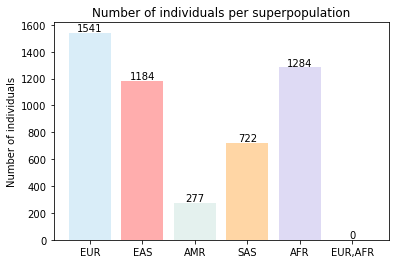

,Type,Sample,0,1,2,3,4,5,6,7,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Superpopulation code
0,AG,AG0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,AMR
1,AG,AG1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,EAS
2,AG,AG2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,EAS
3,AG,AG3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,EAS
4,AG,AG4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,AFR


In [7]:
ag_df["Superpopulation code"] = ag_preds

superpopulation_code_dict = {
    0 : 'EUR',
    1 : 'EAS',
    2 : 'AMR',
    3 : 'SAS',
    4 : 'AFR',
    5 : 'EUR,AFR',
}

superpopulation_code_colors = ['#D9EDF8', '#FFADAD', '#E4F1EE', '#FFD6A5', '#DEDAF4', '#FDFFB6']

fig, ax = plt.subplots()

individual_per_pop = []
pop_names = ["EUR", "EAS", "AMR", "SAS", "AFR", "EUR,AFR"]
for i in range(6):
    individual_per_pop.append(ag_df[ag_df['Superpopulation code'] == i].shape[0])

bars = ax.bar(pop_names, height=individual_per_pop, color=superpopulation_code_colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, horizontalalignment='center')
ax.set_ylabel('Number of individuals')
ax.set_title('Number of individuals per superpopulation')

plt.show()

ag_df["Superpopulation code"].replace(superpopulation_code_dict, inplace=True)

ag_df.head()

In [8]:
ag_tsv = ag_df[["Sample", "Superpopulation code"]]
ag_tsv.to_csv("./generated/WGAN.tsv", sep=",", na_rep='', index=False)
ag_tsv.head()

,Sample,Superpopulation code
0,AG0,AMR
1,AG1,EAS
2,AG2,EAS
3,AG3,EAS
4,AG4,AFR
